<a href="https://colab.research.google.com/github/akrutiisingh/Spotify-Playlist-Analysis/blob/main/Spotify_hit_playlist_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'spotify-top-hit-playlist-2010-2022:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F3712790%2F6434026%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240618%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240618T181039Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D15158b27e1a9248e5b9bc5dbd8390321e271c1253bb09424ba7a49019bd94d68f73eef7b14b69a7313da86181af149036d2cda7dac875ba62109c9c13ceb25a1b48c64f567559aa6985a5bf2a17333d7a5a44f5e3ff0df9e29ba1e861d0794a156969bd94b774431f5fae6f58881f3e9ec56ee758325896ef90234b5503bd331cab19bbb3dc94c8fd4cbfa6626933666a9b945168fd8cf286826b20e73c6880b92b22a324450b4622db451b8b74ebde2a437f4ab023d9c3eca56f13ad5ef76730b5080af2d77f81c5757418b9c08cc2f200afab5a96306338cf0d28d6c2b0738c037b7ca670e01c9bc88691b67fad72c5bc95f9464cbcb501441ccf70351fe4e'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 214666 bytes downloaded
Downloaded and uncompressed: spotify-top-hit-playlist-2010-2022
Data source import complete.


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spotify-top-hit-playlist-2010-2022/playlist_2010to2022.csv


In [3]:
df=pd.read_csv('/kaggle/input/spotify-top-hit-playlist-2010-2022/playlist_2010to2022.csv')
df #loading csv file

,playlist_url,year,track_id,track_name,track_popularity,album,artist_id,artist_name,artist_genres,artist_popularity,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,https://open.spotify.com/playlist/37i9dQZF1DWU...,2000,3AJwUDP919kvQ9QcozQPxg,Yellow,91,Parachutes,4gzpq5DPGxSnKTe4SA8HAU,Coldplay,"['permanent wave', 'pop']",86,...,-7.227,1.0,0.0281,0.00239,0.000121,0.2340,0.285,173.372,266773.0,4.0
1,https://open.spotify.com/playlist/37i9dQZF1DWU...,2000,2m1hi0nfMR9vdGC8UcrnwU,All The Small Things,84,Enema Of The State,6FBDaR13swtiWwGhX1WQsP,blink-182,"['alternative metal', 'modern rock', 'pop punk...",75,...,-4.918,1.0,0.0488,0.01030,0.000000,0.6120,0.684,148.726,167067.0,4.0
2,https://open.spotify.com/playlist/37i9dQZF1DWU...,2000,3y4LxiYMgDl4RethdzpmNe,Breathe,69,Breathe,25NQNriVT2YbSW80ILRWJa,Faith Hill,"['contemporary country', 'country', 'country d...",61,...,-9.007,1.0,0.0290,0.17300,0.000000,0.2510,0.278,136.859,250547.0,4.0
3,https://open.spotify.com/playlist/37i9dQZF1DWU...,2000,60a0Rd6pjrkxjPbaKzXjfq,In the End,88,Hybrid Theory (Bonus Edition),6XyY86QOPPrYVGvF9ch6wz,Linkin Park,"['alternative metal', 'nu metal', 'post-grunge...",83,...,-5.870,0.0,0.0584,0.00958,0.000000,0.2090,0.400,105.143,216880.0,4.0
4,https://open.spotify.com/playlist/37i9dQZF1DWU...,2000,62bOmKYxYg7dhrC6gH9vFn,Bye Bye Bye,74,No Strings Attached,6Ff53KvcvAj5U7Z1vojB5o,*NSYNC,"['boy band', 'dance pop', 'pop']",65,...,-4.843,0.0,0.0479,0.03100,0.001200,0.0821,0.861,172.638,200400.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2295,https://open.spotify.com/playlist/56r5qRUv3jSx...,2022,2g6tReTlM2Akp41g0HaeXN,Die Hard,79,Mr. Morale & The Big Steppers,2YZyLoL8N0Wb9xBt1NhZWg,Kendrick Lamar,"['conscious hip hop', 'hip hop', 'rap', 'west ...",86,...,-8.072,0.0,0.2470,0.31900,0.001160,0.1270,0.362,100.988,239027.0,4.0
2296,https://open.spotify.com/playlist/56r5qRUv3jSx...,2022,4pi1G1x8tl9VfdD9bL3maT,Big Energy,69,777,3MdXrJWsbVzdn6fe5JYkSQ,Latto,['trap queen'],85,...,-4.431,0.0,0.1150,0.04530,0.000000,0.3410,0.794,106.022,172540.0,4.0
2297,https://open.spotify.com/playlist/56r5qRUv3jSx...,2022,3LtpKP5abr2qqjunvjlX5i,Doja,86,Doja,5H4yInM5zmHqpKIoMNAx4r,Central Cee,['melodic drill'],82,...,-7.430,1.0,0.2880,0.38000,0.000000,0.4030,0.972,140.040,97393.0,4.0
2298,https://open.spotify.com/playlist/56r5qRUv3jSx...,2022,3XOalgusokruzA5ZBA2Qcb,pushin P (feat. Young Thug),77,DS4EVER,2hlmm7s2ICUX0LVIhVFlZQ,Gunna,"['atl hip hop', 'melodic rap', 'rap', 'trap']",84,...,-4.572,0.0,0.1870,0.00783,0.006930,0.1290,0.488,77.502,136267.0,1.0


In [4]:
df.head(10) #first 10 rows

,playlist_url,year,track_id,track_name,track_popularity,album,artist_id,artist_name,artist_genres,artist_popularity,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,https://open.spotify.com/playlist/37i9dQZF1DWU...,2000,3AJwUDP919kvQ9QcozQPxg,Yellow,91,Parachutes,4gzpq5DPGxSnKTe4SA8HAU,Coldplay,"['permanent wave', 'pop']",86,...,-7.227,1.0,0.0281,0.00239,0.000121,0.2340,0.285,173.372,266773.0,4.0
1,https://open.spotify.com/playlist/37i9dQZF1DWU...,2000,2m1hi0nfMR9vdGC8UcrnwU,All The Small Things,84,Enema Of The State,6FBDaR13swtiWwGhX1WQsP,blink-182,"['alternative metal', 'modern rock', 'pop punk...",75,...,-4.918,1.0,0.0488,0.01030,0.000000,0.6120,0.684,148.726,167067.0,4.0
2,https://open.spotify.com/playlist/37i9dQZF1DWU...,2000,3y4LxiYMgDl4RethdzpmNe,Breathe,69,Breathe,25NQNriVT2YbSW80ILRWJa,Faith Hill,"['contemporary country', 'country', 'country d...",61,...,-9.007,1.0,0.0290,0.17300,0.000000,0.2510,0.278,136.859,250547.0,4.0
3,https://open.spotify.com/playlist/37i9dQZF1DWU...,2000,60a0Rd6pjrkxjPbaKzXjfq,In the End,88,Hybrid Theory (Bonus Edition),6XyY86QOPPrYVGvF9ch6wz,Linkin Park,"['alternative metal', 'nu metal', 'post-grunge...",83,...,-5.870,0.0,0.0584,0.00958,0.000000,0.2090,0.400,105.143,216880.0,4.0
4,https://open.spotify.com/playlist/37i9dQZF1DWU...,2000,62bOmKYxYg7dhrC6gH9vFn,Bye Bye Bye,74,No Strings Attached,6Ff53KvcvAj5U7Z1vojB5o,*NSYNC,"['boy band', 'dance pop', 'pop']",65,...,-4.843,0.0,0.0479,0.03100,0.001200,0.0821,0.861,172.638,200400.0,4.0
5,https://open.spotify.com/playlist/37i9dQZF1DWU...,2000,5Mmk2ii6laakqfeCT7OnVD,Thong Song,73,Unleash The Dragon,6x9QLdzo6eBZxJ1bHsDkjg,Sisqo,"['contemporary r&b', 'dirty south rap', 'hip p...",56,...,-6.959,1.0,0.0654,0.11900,0.000096,0.0700,0.714,121.549,253733.0,4.0
6,https://open.spotify.com/playlist/37i9dQZF1DWU...,2000,3yfqSUWxFvZELEM4PmlwIR,The Real Slim Shady,88,The Marshall Mathers LP,7dGJo4pcD2V6oG8kP0tJRR,Eminem,"['detroit hip hop', 'hip hop', 'rap']",88,...,-4.244,0.0,0.0572,0.03020,0.000000,0.0454,0.760,104.504,284200.0,4.0
7,https://open.spotify.com/playlist/37i9dQZF1DWU...,2000,7oQSevUCbYs4QawXTHQVV1,Rock DJ,57,Sing When You're Winning,2HcwFjNelS49kFbfvMxQYw,Robbie Williams,"['dance rock', 'europop']",69,...,-4.307,1.0,0.0326,0.02600,0.000000,0.0981,0.842,103.032,260560.0,4.0
8,https://open.spotify.com/playlist/37i9dQZF1DWU...,2000,7H6ev70Weq6DdpZyyTmUXk,Say My Name,80,The Writing's On The Wall,1Y8cdNmUJH7yBTd9yOvr5i,Destiny's Child,"['dance pop', 'girl group', 'pop', 'r&b', 'urb...",69,...,-3.525,0.0,0.1020,0.27300,0.000000,0.1490,0.734,138.009,271333.0,4.0
9,https://open.spotify.com/playlist/37i9dQZF1DWU...,2000,64BbK9SFKH2jk86U3dGj2P,Otherside,83,Californication (Deluxe Edition),0L8ExT028jH3ddEcZwqJJ5,Red Hot Chili Peppers,"['alternative rock', 'funk metal', 'funk rock'...",80,...,-3.265,1.0,0.0574,0.00316,0.000202,0.0756,0.513,123.229,255373.0,4.0


In [5]:
df.tail(10) #last 10 rows

,playlist_url,year,track_id,track_name,track_popularity,album,artist_id,artist_name,artist_genres,artist_popularity,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
2290,https://open.spotify.com/playlist/56r5qRUv3jSx...,2022,6zJejIfVYLgjud3lTk4DLB,SNAP,3,SNAP PACK,46xBNx0j6cwY6sD9LgMTm1,Rosa Linn,['alt z'],69,...,-8.198,1.0,0.0638,0.10700,0.000010,0.4470,0.525,170.010,179551.0,4.0
2291,https://open.spotify.com/playlist/56r5qRUv3jSx...,2022,5ww2BF9slyYgNOk37BlC4u,La Bachata,88,La Bachata,0tmwSHipWxN12fsoLcFU3B,Manuel Turizo,"['colombian pop', 'reggaeton', 'reggaeton colo...",82,...,-5.329,0.0,0.0364,0.58300,0.000002,0.2180,0.850,124.980,162638.0,4.0
2292,https://open.spotify.com/playlist/56r5qRUv3jSx...,2022,0T5iIrXA4p5GsubkhuBIKV,Until I Found You,84,Until I Found You,5XKFrudbV4IiuE5WuTPRmT,Stephen Sanchez,['gen z singer-songwriter'],74,...,-6.050,1.0,0.0288,0.72700,0.000000,0.1740,0.227,101.358,177720.0,3.0
2293,https://open.spotify.com/playlist/56r5qRUv3jSx...,2022,0QHEIqNKsMoOY5urbzN48u,Made You Look,86,Takin' It Back,6JL8zeS1NmiOftqZTRgdTz,Meghan Trainor,"['hip pop', 'pop']",75,...,-3.562,1.0,0.0665,0.34500,0.000002,0.0771,0.884,144.981,134256.0,4.0
2294,https://open.spotify.com/playlist/56r5qRUv3jSx...,2022,3rWDp9tBPQR9z6U5YyRSK4,Midnight Rain,86,Midnights,06HL4z0CvFAxyc27GXpf02,Taylor Swift,['pop'],100,...,-11.738,1.0,0.0767,0.69000,0.000052,0.1150,0.230,139.865,174783.0,4.0
2295,https://open.spotify.com/playlist/56r5qRUv3jSx...,2022,2g6tReTlM2Akp41g0HaeXN,Die Hard,79,Mr. Morale & The Big Steppers,2YZyLoL8N0Wb9xBt1NhZWg,Kendrick Lamar,"['conscious hip hop', 'hip hop', 'rap', 'west ...",86,...,-8.072,0.0,0.2470,0.31900,0.001160,0.1270,0.362,100.988,239027.0,4.0
2296,https://open.spotify.com/playlist/56r5qRUv3jSx...,2022,4pi1G1x8tl9VfdD9bL3maT,Big Energy,69,777,3MdXrJWsbVzdn6fe5JYkSQ,Latto,['trap queen'],85,...,-4.431,0.0,0.1150,0.04530,0.000000,0.3410,0.794,106.022,172540.0,4.0
2297,https://open.spotify.com/playlist/56r5qRUv3jSx...,2022,3LtpKP5abr2qqjunvjlX5i,Doja,86,Doja,5H4yInM5zmHqpKIoMNAx4r,Central Cee,['melodic drill'],82,...,-7.430,1.0,0.2880,0.38000,0.000000,0.4030,0.972,140.040,97393.0,4.0
2298,https://open.spotify.com/playlist/56r5qRUv3jSx...,2022,3XOalgusokruzA5ZBA2Qcb,pushin P (feat. Young Thug),77,DS4EVER,2hlmm7s2ICUX0LVIhVFlZQ,Gunna,"['atl hip hop', 'melodic rap', 'rap', 'trap']",84,...,-4.572,0.0,0.1870,0.00783,0.006930,0.1290,0.488,77.502,136267.0,1.0
2299,https://open.spotify.com/playlist/56r5qRUv3jSx...,2022,1r8ZCjfrQxoy2wVaBUbpwg,Thousand Miles,77,Thousand Miles,2tIP7SsRs7vjIcLrU85W8J,The Kid LAROI,['australian hip hop'],78,...,-4.658,1.0,0.0768,0.08580,0.000000,0.0884,0.203,80.565,164782.0,4.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2300 entries, 0 to 2299
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   playlist_url       2300 non-null   object 
 1   year               2300 non-null   int64  
 2   track_id           2300 non-null   object 
 3   track_name         2300 non-null   object 
 4   track_popularity   2300 non-null   int64  
 5   album              2300 non-null   object 
 6   artist_id          2300 non-null   object 
 7   artist_name        2300 non-null   object 
 8   artist_genres      2300 non-null   object 
 9   artist_popularity  2300 non-null   int64  
 10  danceability       2299 non-null   float64
 11  energy             2299 non-null   float64
 12  key                2299 non-null   float64
 13  loudness           2299 non-null   float64
 14  mode               2299 non-null   float64
 15  speechiness        2299 non-null   float64
 16  acousticness       2299 

In [7]:
df.describe()

,year,track_popularity,artist_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,2300.000000,2300.000000,2300.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000
mean,2011.000000,70.943478,72.869565,0.660116,0.693047,5.277947,-5.784040,0.598521,0.097795,0.157689,0.013766,0.172618,0.535110,120.512450,226033.494128,3.982166
std,6.634692,12.291526,12.179263,0.141137,0.164838,3.628494,2.080853,0.490304,0.092445,0.203844,0.083990,0.131620,0.227821,27.617729,42063.678588,0.219054
min,2000.000000,0.000000,29.000000,0.162000,0.051900,0.000000,-21.107000,0.000000,0.022500,0.000013,0.000000,0.021000,0.037700,60.019000,97393.000000,1.000000
25%,2005.000000,66.000000,65.000000,0.572000,0.586000,2.000000,-6.823500,0.000000,0.038000,0.016500,0.000000,0.089950,0.360500,98.569500,200179.500000,4.000000
50%,2011.000000,72.000000,74.000000,0.671000,0.712000,5.000000,-5.511000,1.000000,0.056800,0.068900,0.000000,0.119000,0.540000,120.000000,221653.000000,4.000000
75%,2017.000000,79.000000,82.000000,0.759500,0.820000,8.000000,-4.364500,1.000000,0.115500,0.223000,0.000054,0.220000,0.722000,137.028000,245950.000000,4.000000
max,2022.000000,100.000000,100.000000,0.975000,0.999000,11.000000,-0.276000,1.000000,0.576000,0.978000,0.985000,0.843000,0.974000,210.857000,688453.000000,5.000000


In [8]:
null_val= df.isnull().sum()
null_val

playlist_url         0
year                 0
track_id             0
track_name           0
track_popularity     0
album                0
artist_id            0
artist_name          0
artist_genres        0
artist_popularity    0
danceability         1
energy               1
key                  1
loudness             1
mode                 1
speechiness          1
acousticness         1
instrumentalness     1
liveness             1
valence              1
tempo                1
duration_ms          1
time_signature       1
dtype: int64

In [9]:
data_cleaned = df.dropna() #clean data

# Check the shape of the cleaned data
data_cleaned.shape

(2299, 23)

In [10]:
# Since the following columns do not hold
# as much pertinent information, we will drop them

df.drop(columns=['playlist_url', 'track_id', 'artist_id'],
       inplace=True)
df

,year,track_name,track_popularity,album,artist_name,artist_genres,artist_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,2000,Yellow,91,Parachutes,Coldplay,"['permanent wave', 'pop']",86,0.429,0.661,11.0,-7.227,1.0,0.0281,0.00239,0.000121,0.2340,0.285,173.372,266773.0,4.0
1,2000,All The Small Things,84,Enema Of The State,blink-182,"['alternative metal', 'modern rock', 'pop punk...",75,0.434,0.897,0.0,-4.918,1.0,0.0488,0.01030,0.000000,0.6120,0.684,148.726,167067.0,4.0
2,2000,Breathe,69,Breathe,Faith Hill,"['contemporary country', 'country', 'country d...",61,0.529,0.496,7.0,-9.007,1.0,0.0290,0.17300,0.000000,0.2510,0.278,136.859,250547.0,4.0
3,2000,In the End,88,Hybrid Theory (Bonus Edition),Linkin Park,"['alternative metal', 'nu metal', 'post-grunge...",83,0.556,0.864,3.0,-5.870,0.0,0.0584,0.00958,0.000000,0.2090,0.400,105.143,216880.0,4.0
4,2000,Bye Bye Bye,74,No Strings Attached,*NSYNC,"['boy band', 'dance pop', 'pop']",65,0.610,0.926,8.0,-4.843,0.0,0.0479,0.03100,0.001200,0.0821,0.861,172.638,200400.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2295,2022,Die Hard,79,Mr. Morale & The Big Steppers,Kendrick Lamar,"['conscious hip hop', 'hip hop', 'rap', 'west ...",86,0.775,0.736,1.0,-8.072,0.0,0.2470,0.31900,0.001160,0.1270,0.362,100.988,239027.0,4.0
2296,2022,Big Energy,69,777,Latto,['trap queen'],85,0.937,0.793,11.0,-4.431,0.0,0.1150,0.04530,0.000000,0.3410,0.794,106.022,172540.0,4.0
2297,2022,Doja,86,Doja,Central Cee,['melodic drill'],82,0.911,0.573,6.0,-7.430,1.0,0.2880,0.38000,0.000000,0.4030,0.972,140.040,97393.0,4.0
2298,2022,pushin P (feat. Young Thug),77,DS4EVER,Gunna,"['atl hip hop', 'melodic rap', 'rap', 'trap']",84,0.773,0.422,1.0,-4.572,0.0,0.1870,0.00783,0.006930,0.1290,0.488,77.502,136267.0,1.0


In [11]:
df.max() #max of each coloumn

year                               2022
track_name           you broke me first
track_popularity                    100
album                            Ã‰pico
artist_name                   will.i.am
artist_genres                        []
artist_popularity                   100
danceability                      0.975
energy                            0.999
key                                11.0
loudness                         -0.276
mode                                1.0
speechiness                       0.576
acousticness                      0.978
instrumentalness                  0.985
liveness                          0.843
valence                           0.974
tempo                           210.857
duration_ms                    688453.0
time_signature                      5.0
dtype: object

In [12]:
df.min() #min of each coloumn

year                                        2000
track_name                               #SELFIE
track_popularity                               0
album                                        "7"
artist_name                               *NSYNC
artist_genres        ['acid house', 'pop house']
artist_popularity                             29
danceability                               0.162
energy                                    0.0519
key                                          0.0
loudness                                 -21.107
mode                                         0.0
speechiness                               0.0225
acousticness                            0.000013
instrumentalness                             0.0
liveness                                   0.021
valence                                   0.0377
tempo                                     60.019
duration_ms                              97393.0
time_signature                               1.0
dtype: object

In [13]:
top_10 = df.sort_values(by='track_popularity', ascending=False).head(10)  # This will give the first 10 rows of the highest rated data set and reassign it to same variable.
top_10 = top_10['track_name']# Only show the name of the top 10 popular tracks
top_10

1903                             Cruel Summer
2202                                Anti-Hero
2012                                   august
2286                          I'm Good (Blue)
2289            Calm Down (with Selena Gomez)
2227                          I Ain't Worried
2162                          Blinding Lights
1600                                  Starboy
2218    Quevedo: Bzrp Music Sessions, Vol. 52
1304                             Another Love
Name: track_name, dtype: object

In [14]:
songs_per_year= df.groupby('year')['track_name'].count()
songs_per_year

year
2000    100
2001    100
2002    100
2003    100
2004    100
2005    100
2006    100
2007    100
2008    100
2009    100
2010    100
2011    100
2012    100
2013    100
2014    100
2015    100
2016    100
2017    100
2018    100
2019    100
2020    100
2021    100
2022    100
Name: track_name, dtype: int64

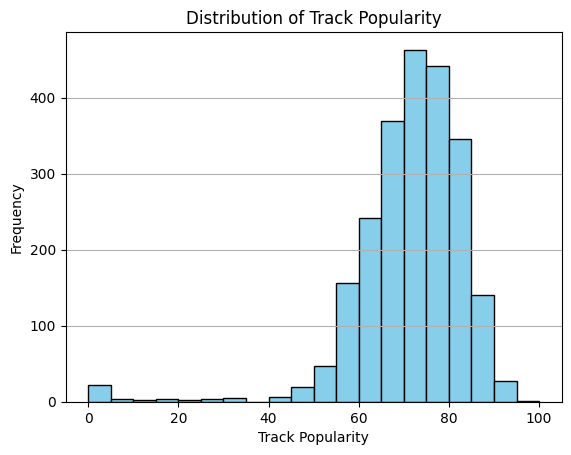

In [15]:
import matplotlib.pyplot as plt
# Plotting the distribution of track popularity
plt.hist(data_cleaned['track_popularity'],bins=20,  color='skyblue', edgecolor='black')
plt.title('Distribution of Track Popularity')
plt.xlabel('Track Popularity')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()

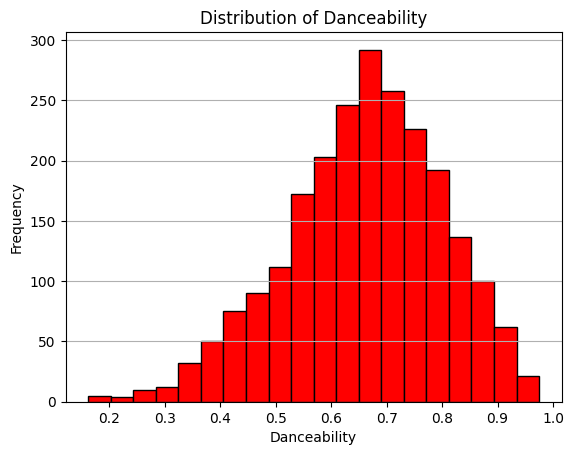

In [16]:
plt.hist(data_cleaned['danceability'],bins=20,  color='red', edgecolor='black')
plt.title('Distribution of Danceability')
plt.xlabel('Danceability')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()

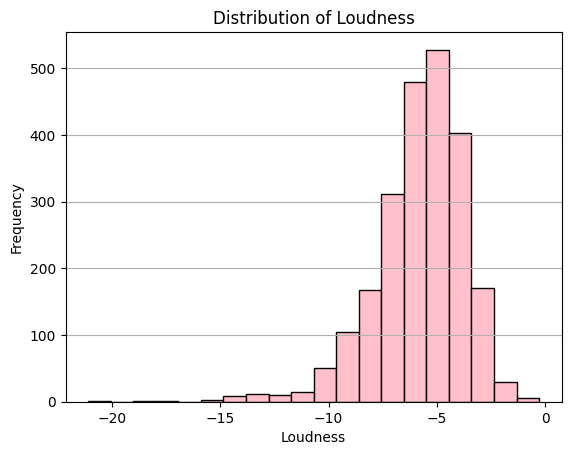

In [17]:
plt.hist(data_cleaned['loudness'],bins=20,  color='pink', edgecolor='black')
plt.title('Distribution of Loudness')
plt.xlabel('Loudness')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()

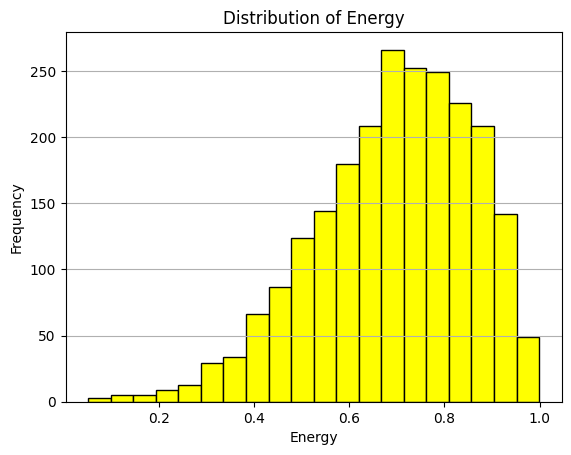

In [18]:
plt.hist(data_cleaned['energy'],bins=20,  color='yellow', edgecolor='black')
plt.title('Distribution of Energy')
plt.xlabel('Energy')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()

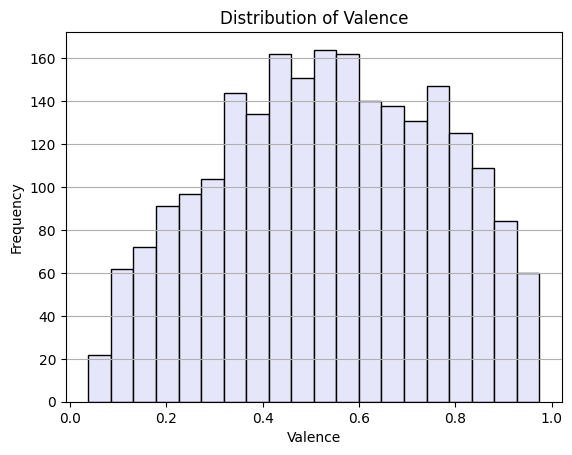

In [19]:
plt.hist(data_cleaned['valence'],bins=20,  color='#E6E6FA', edgecolor='black')
plt.title('Distribution of Valence')
plt.xlabel('Valence')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()

In [20]:
artist_counts = df['artist_name'].value_counts()
# Print the artist counts
print(artist_counts)

artist_name
Drake                   32
Taylor Swift            31
Rihanna                 27
Ariana Grande           22
BeyoncÃ©                22
                        ..
Kaiser Chiefs            1
Bone Thugs-N-Harmony     1
Elliott Yamin            1
MiMS                     1
Gunna                    1
Name: count, Length: 891, dtype: int64


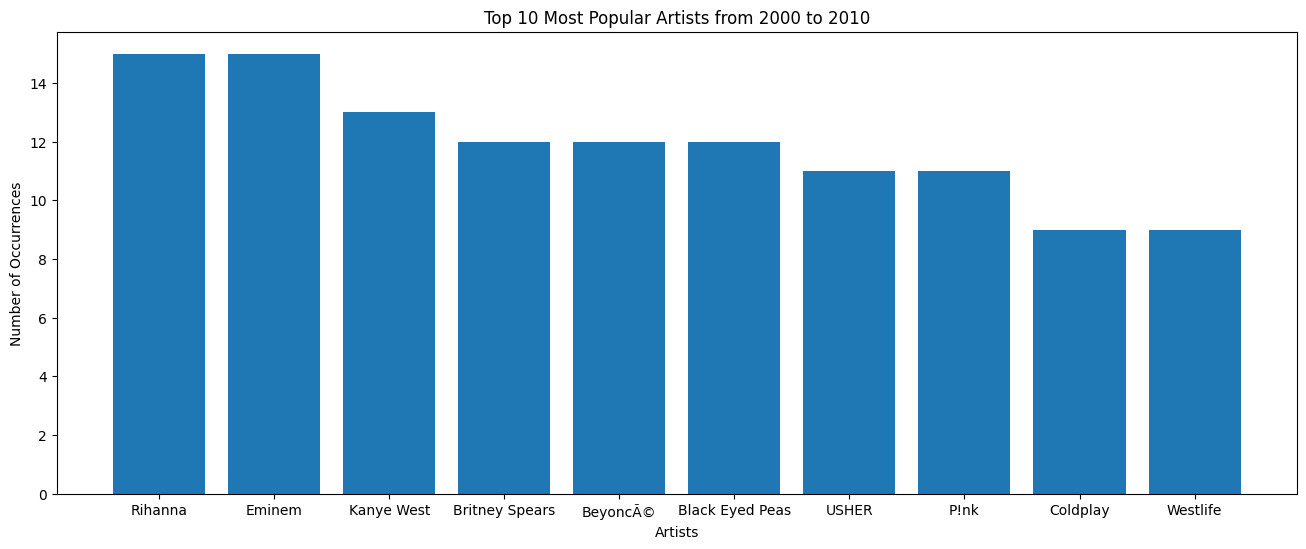

In [21]:
df = df[(df['year'] >= 2000) & (df['year'] <= 2010)]
# Get the top 10 most popular artists
top_10_artists = df['artist_name'].value_counts().nlargest(10)
# Create a bar plot of the top 10 most popular artists
plt.figure(figsize=(16,6))
plt.bar(top_10_artists.index, top_10_artists.values)
plt.xlabel('Artists')
plt.ylabel('Number of Occurrences')
plt.title('Top 10 Most Popular Artists from 2000 to 2010')
plt.show()

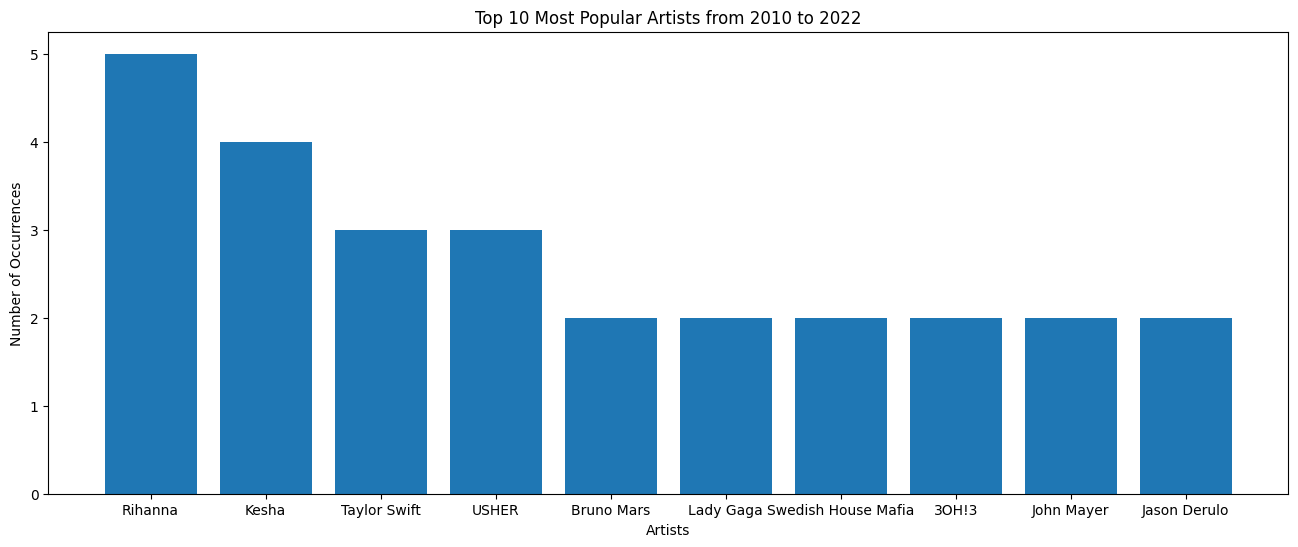

In [22]:
df = df[(df['year'] >= 2010) & (df['year'] <= 2022)]
# Get the top 10 most popular artists
top_10_artists = df['artist_name'].value_counts().nlargest(10)
# Create a bar plot of the top 10 most popular artists
plt.figure(figsize=(16,6))
plt.bar(top_10_artists.index, top_10_artists.values)
plt.xlabel('Artists')
plt.ylabel('Number of Occurrences')
plt.title('Top 10 Most Popular Artists from 2010 to 2022')
plt.show()

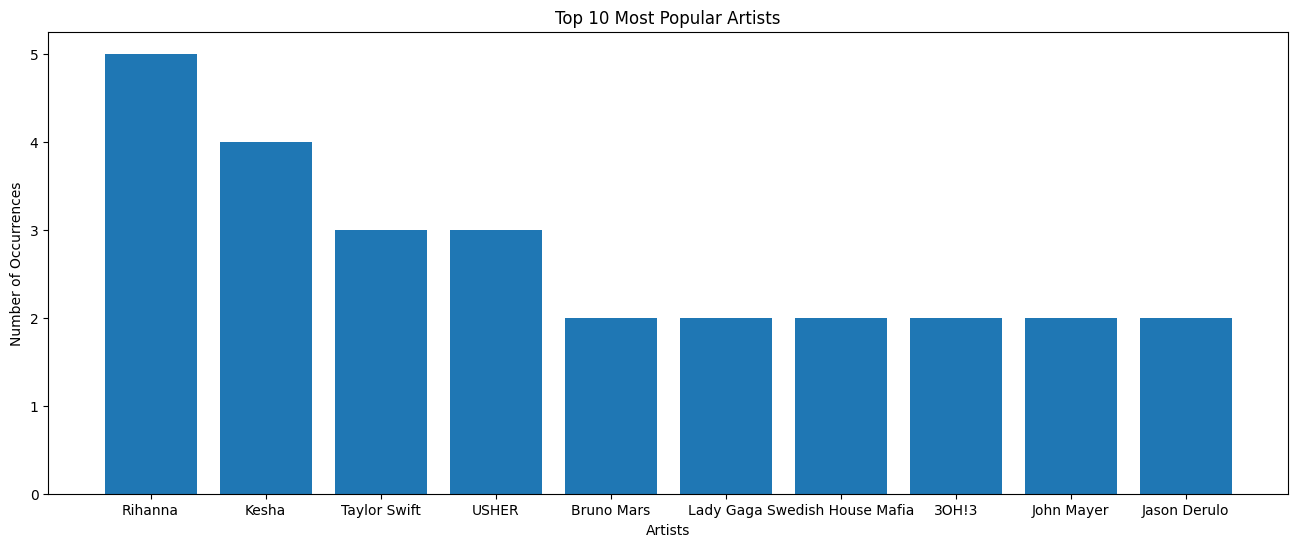

In [23]:
top_10_artists = df['artist_name'].value_counts().nlargest(10)
# Create a bar plot of the top 10 most popular artists
plt.figure(figsize=(16,6))
plt.bar(top_10_artists.index, top_10_artists.values)
plt.xlabel('Artists')
plt.ylabel('Number of Occurrences')
plt.title('Top 10 Most Popular Artists')
plt.show()